# Effect of capacity utilization on unitary performance of a truck
[Romain Sacchi](https://github.com/romainsacchi)

## Purpose

Most static LCA models, such as those contained in inventory databases, scale linearly.
While this is not an issue for systems where marginal impacts are similar to average impacts, such as 1 kWh from a coal-fired power plant, it is more problematic for systems that are greatly influenced by the loading factor.
Examples are renewable energy sources (solar PV, wind mills), but also passenger and goods vehicles.

Demonstrate the non-linear relation between increment in load transported and environmental impacts per ton-kilometer. THis is done using a 40-ton diesel truck.

A second example is the non-linear relation between trip distance and environmental impacts per ton-kilometer. This is done using a 40-ton battery electric truck.

Both examples use the [carculator_truck](https://github.com/romainsacchi/carculator_truck) library.

## Methodology

1. Set up a truck LCA model
2. Solve the system (sizing of components, incl. energy storage) given the load required
3. Solve inventory and display impacts

Repeat steps 1 to 3 for each increment in payload.

The same is done with increasing the trip length.


## Results

GHG emissions per ton-km do not scale linearly with transported load. Also, the marginal impact of adding cargo mass on the ton-km GHG emissions is decreasing. Hence, transporting 10 tons over 1 km does not equal transporting 1 ton over 1 km ten times.

Similarly, increasing the range capacity of a battery electric truck does not scale linearly with the per ton-km GHG emissions. 


# Setup

## Library import
We import all the required Python libraries

In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-colorblind')

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Local library import
We import all the required local libraries libraries

In [7]:
# Include local library paths
import sys

try:
    import carculator_truck as ct
except ModuleNotFoundError:
    !{sys.executable} -m pip install carculator_truck
    import carculator_truck as ct

In [8]:
ct.__version__

(0, 0, 7)

# Parameter definition


In [9]:
LIFETIME_KM = 200000

# Data import


In [10]:
tip = ct.TruckInputParameters() 
tip.static()
_, array = ct.fill_xarray_from_input_parameters(tip)

# Data processing

In [13]:
l_res=[
    [
    "powertrain type",
    "size",
    "target range [km]",
    "lifetime [km]",
    "curb mass [kg]",
    "total cargo mass [kg]",
    "capacity utilization [%]",
    "energy battery mass [kg]",
    "fuel mass [kg]",
    "electric energy stored [kWh]",
    "oxidation energy stored [kj]",
    'direct - exhaust',
    'direct - non-exhaust',
    'energy chain',
    'maintenance',
    'glider',
    'EoL',
    'powertrain',
    'energy storage',
    'road'
    ]
      ]
      
for load_factor in np.arange(0.01, 1.01, 0.05):
    
    array.loc[dict(parameter="capacity utilization")] = load_factor
    tm = ct.TruckModel(array, cycle="Long haul", country="RER")
    tm.set_all()
    
    ic = ct.InventoryCalculation(tm)
    res = ic.calculate_impacts()
    
    for pt in tm.array.powertrain.values:
        for s in tm.array.coords["size"].values:
            specs = [pt, s]
            specs.extend(tm.array.sel(powertrain=pt,
                                      size=s,
                                      year=2020,
                                      value=0,
                                      parameter=[
                                        "target range",
                                        "lifetime kilometers",
                                        "curb mass",
                                        "total cargo mass",
                                        "capacity utilization",
                                        "energy battery mass",
                                        "fuel mass",
                                        "electric energy stored",
                                        "oxidation energy stored",
                                      ]).values.tolist()
                        )
            
            lcia = res.sel(powertrain=pt, size=s, year=2020, impact_category="climate change", value=0).values.tolist()
            
            specs.extend(lcia)
            l_res.append(specs)

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2010    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2020    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2030    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2040    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   BEV, 2050    | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2000   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2010   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2020   | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 | 0.01 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   BEV, 2010    | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   BEV, 2020    | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   BEV, 2030    | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   BEV, 2040    | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   BEV, 2050    | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   FCEV, 2000   | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   FCEV, 2010   | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   FCEV, 2020   | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2010    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2020    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2030    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2040    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   BEV, 2050    | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2000   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2010   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2020   | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   BEV, 2010    | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   BEV, 2020    | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   BEV, 2030    | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   BEV, 2040    | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   BEV, 2050    | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   FCEV, 2000   | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   FCEV, 2010   | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   FCEV, 2020   | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   BEV, 2010    | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   BEV, 2020    | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   BEV, 2030    | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   BEV, 2040    | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   BEV, 2050    | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   FCEV, 2000   | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   FCEV, 2010   | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   FCEV, 2020   | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2010    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2020    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2030    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2040    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   BEV, 2050    | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2000   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2010   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2020   | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 | 0.26 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   BEV, 2010    | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   BEV, 2020    | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   BEV, 2030    | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   BEV, 2040    | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   BEV, 2050    | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   FCEV, 2000   | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   FCEV, 2010   | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   FCEV, 2020   | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   BEV, 2010    | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   BEV, 2020    | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   BEV, 2030    | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   BEV, 2040    | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   BEV, 2050    | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   FCEV, 2000   | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   FCEV, 2010   | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   FCEV, 2020   | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 | 0.41 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2010    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2020    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2030    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2040    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   BEV, 2050    | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2000   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2010   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2020   | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 | 0.46 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2010    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2020    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2030    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2040    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   BEV, 2050    | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2000   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2010   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2020   | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 | 0.51 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2010    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2020    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2030    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2040    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   BEV, 2050    | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2000   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2010   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2020   | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 | 0.56 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   BEV, 2010    | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   BEV, 2020    | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   BEV, 2030    | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   BEV, 2040    | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   BEV, 2050    | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   FCEV, 2000   | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   FCEV, 2010   | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   FCEV, 2020   | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 | 0.61 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2010    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2020    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2030    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2040    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   BEV, 2050    | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2000   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2010   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2020   | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 | 0.66 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   BEV, 2010    | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   BEV, 2020    | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   BEV, 2030    | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   BEV, 2040    | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   BEV, 2050    | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   FCEV, 2000   | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   FCEV, 2010   | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   FCEV, 2020   | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 | 0.71 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2010    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2020    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2030    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2040    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   BEV, 2050    | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2000   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2010   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2020   | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 | 0.76 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2010    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2020    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2030    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2040    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   BEV, 2050    | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2000   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2010   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2020   | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 | 0.81 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   BEV, 2010    | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   BEV, 2020    | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   BEV, 2030    | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   BEV, 2040    | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   BEV, 2050    | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   FCEV, 2000   | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   FCEV, 2010   | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   FCEV, 2020   | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 | 0.86 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2010    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2020    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2030    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2040    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   BEV, 2050    | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2000   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2010   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2020   | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 | 0.91 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   BEV, 2010    | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   BEV, 2020    | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   BEV, 2030    | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   BEV, 2040    | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   BEV, 2050    | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   FCEV, 2000   | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   FCEV, 2010   | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   FCEV, 2020   | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 | 0.96 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [14]:
df = pd.DataFrame(l_res[1:], columns=l_res[0])
df.loc[df["direct - non-exhaust"]<0,"direct - non-exhaust"] = 0
df.loc[df["direct - exhaust"]<0,"direct - exhaust"] = 0
df.loc[:,"capacity utilization [%]"] *= 100
df.loc[:, "fuel consumption per 100 km"] = (df.loc[:,"fuel mass [kg]"]/df.loc[:,"target range [km]"])*100

In [15]:
cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df_total = ((df.loc[:,"total cargo mass [kg]"]/1000)*df.loc[:,"lifetime [km]"]*df.loc[:,cols].T).T
df_total.columns=[c+" - total" for c in df_total.columns]
df = pd.concat([df, df_total], axis=1)

In [16]:
df.head()

,powertrain type,size,target range [km],lifetime [km],curb mass [kg],total cargo mass [kg],capacity utilization [%],energy battery mass [kg],fuel mass [kg],electric energy stored [kWh],oxidation energy stored [kj],direct - exhaust,direct - non-exhaust,energy chain,maintenance,glider,EoL,powertrain,energy storage,road,fuel consumption per 100 km,direct - exhaust - total,direct - non-exhaust - total,energy chain - total,maintenance - total,glider - total,EoL - total,powertrain - total,energy storage - total,road - total
0,ICEV-d,3.5t,800.0,220000.0,2226.355469,11.986445,1.0,0.0,58.816124,0.0,695.760925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.352015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ICEV-d,7.5t,800.0,650000.0,3999.117676,34.258823,1.0,0.0,78.564949,0.0,929.378113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.820619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ICEV-d,18t,800.0,400000.0,7907.943848,100.170563,1.0,0.0,117.780922,0.0,1393.280518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.722615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ICEV-d,26t,800.0,560000.0,8992.266602,169.327347,1.0,0.0,118.076912,0.0,1396.781982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.759614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ICEV-d,32t,800.0,1050000.0,11857.964844,200.670349,1.0,0.0,142.130432,0.0,1681.321289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.766304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.to_excel("results_ICEV.xlsx")

### Total emissions per truck, as we increment the load.
* left: total life cycle GHG emissions, function of load factor
* middle: per ton-km GHG emissions, function of load factor
* right: marginal per ton-km GHG emissions, function of inital cargo mass

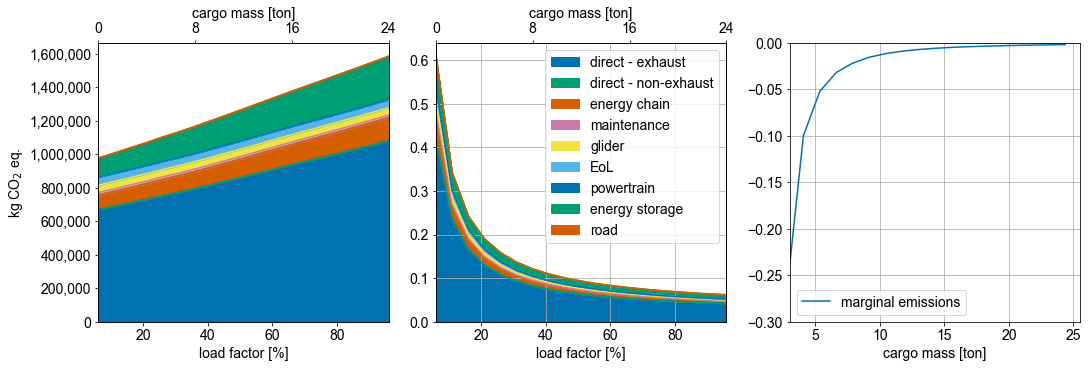

In [34]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 14
fig1, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15,5))

cols_total=[
    "direct - exhaust - total",
    "direct - non-exhaust - total",
    "energy chain - total",
    "maintenance - total",
    "glider - total",
    "EoL - total",
    "powertrain - total",
    "energy storage - total",
    "road - total",
]

cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),:].plot(x="capacity utilization [%]",
                                                                     y=cols_total,
                                                                     kind="area", ax=axes[0])
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].set_ylabel("kg CO$_2$ eq.")
axes[0].get_legend().remove()
axes[0].set_xlim(6,)
axes[0].set_xlabel("load factor [%]")

ax2 = axes[0].twiny()
vals = (df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"total cargo mass [kg]"]/1000).values
vals = np.round(vals, 0)
ax2.set_xticks(vals)
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_xlabel("cargo mass [ton]")



df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),:].plot(x="capacity utilization [%]",
                                                                     y=cols,
                                                                     kind="area", ax=axes[1])


axes[1].legend()
axes[1].grid()
ax3 = axes[1].twiny()
ax3.set_xticks(vals)
ax3.xaxis.set_major_locator(plt.MaxNLocator(3))
ax3.set_xlabel("cargo mass [ton]")
axes[1].set_xlim(6, )
axes[1].set_xlabel("load factor [%]")

vals_marg=df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),cols_total].sum(axis=1).diff()/\
    ((df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"total cargo mass [kg]"]/1000)*\
    df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"lifetime [km]"]).values

vals_marg=df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),cols].sum(axis=1).diff()

xs=df.loc[(df["powertrain type"]=="ICEV-d")&(df["size"]=="40t"),"total cargo mass [kg]"].values/1000
axes[2].plot(xs, vals_marg.values, label="marginal emissions")
axes[2].set_xlabel("cargo mass [ton]")
axes[2].legend()
axes[2].set_xlim(3,)
axes[2].set_ylim(-.3,0)
axes[2].grid()

plt.savefig("fig1.png")


In [35]:
tip = ct.TruckInputParameters() 
tip.static()
_, array = ct.fill_xarray_from_input_parameters(tip)

In [36]:
l_res=[
    [
    "powertrain type",
    "size",
    "target range [km]",
    "lifetime [km]",
    "curb mass [kg]",
    "total cargo mass [kg]",
    "capacity utilization [%]",
    "energy battery mass [kg]",
    "fuel mass [kg]",
    "electric energy stored [kWh]",
    "oxidation energy stored [kj]",
    'direct - exhaust',
    'direct - non-exhaust',
    'energy chain',
    'maintenance',
    'glider',
    'EoL',
    'powertrain',
    'energy storage',
    'road'
    ]
      ]
      
for target_range in np.arange(100, 1600, 100):
    
    
    tm = ct.TruckModel(array, cycle="Long haul", country="RER")
    array.loc[dict(parameter="target range")] = target_range
    tm.set_all()
    
    ic = ct.InventoryCalculation(tm)
    res = ic.calculate_impacts()
    
    for pt in tm.array.powertrain.values:
        for s in tm.array.coords["size"].values:
            specs = [pt, s]
            specs.extend(tm.array.sel(powertrain=pt,
                                      size=s,
                                      year=2020,
                                      value=0,
                                      parameter=[
                                        "target range",
                                        "lifetime kilometers",
                                        "curb mass",
                                        "total cargo mass",
                                        "capacity utilization",
                                        "energy battery mass",
                                        "fuel mass",
                                        "electric energy stored",
                                        "oxidation energy stored",
                                      ]).values.tolist()
                        )
            
            lcia = res.sel(powertrain=pt, size=s, year=2020, impact_category="climate change", value=0).values.tolist()
            
            specs.extend(lcia)
            l_res.append(specs)

Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Long haul driving cycle is selected. Vehicles will be designed to achieve a minimal range of 800 km.

Capacity utilization assumed (share of available payload used)
+----------------+------+------+------+------+------+------+------+
|                | 3.5t | 7.5t | 18t  | 26t  | 32t  | 40t  | 60t  |
+----------------+------+------+------+------+------+------+------+
|   BEV, 2000    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2010    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2020    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2030    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2040    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   BEV, 2050    | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2000   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2010   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2020   | 0.6  | 0.41 | 0.42 | 0.38 | 0.36 | 0.36 | 0.36 |
|   FCEV, 2030   | 

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\coarse\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [37]:
df_km = pd.DataFrame(l_res[1:], columns=l_res[0])
df_km.loc[df_km["direct - non-exhaust"]<0,"direct - non-exhaust"] = 0
df_km.loc[df_km["direct - exhaust"]<0,"direct - exhaust"] = 0
df_km.loc[:,"capacity utilization [%]"] *= 100
df_km.loc[:, "fuel consumption per 100 km"] = (df_km.loc[:,"fuel mass [kg]"]/df_km.loc[:,"target range [km]"])*100

In [38]:
cols=[
    "direct - exhaust",
    "direct - non-exhaust",
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df_total = ((df_km.loc[:,"total cargo mass [kg]"]/1000)*df_km.loc[:,"lifetime [km]"]*df_km.loc[:,cols].T).T
df_total.columns=[c+" - total" for c in df_total.columns]
df_km = pd.concat([df_km, df_total], axis=1)

In [58]:
df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),["target range [km]"] + cols]

,target range [km],energy chain,maintenance,glider,EoL,powertrain,energy storage,road
33,100.0,0.058829,0.001632,0.004653,0.004366,0.008939,0.016758,0.000168
75,200.0,0.064345,0.001736,0.004951,0.004729,0.019554,0.018527,0.000179
117,300.0,0.071194,0.001866,0.005320,0.005208,0.032453,0.020719,0.000192
159,400.0,0.079227,0.002017,0.005751,0.005692,0.048153,0.023275,0.000208
201,500.0,0.088898,0.002198,0.006268,0.006216,0.067538,0.026347,0.000227
243,600.0,0.101243,0.002430,0.006929,0.006885,0.092300,0.030272,0.000251
285,700.0,0.117525,0.002737,0.007803,0.007768,0.125002,0.035455,0.000282
327,800.0,0.139984,0.003160,0.009009,0.008988,0.170159,0.042612,0.000326
369,900.0,0.173027,0.003782,0.010783,0.010783,0.236616,0.053144,0.000390
411,1000.0,0.227105,0.004798,0.013679,0.013712,0.345075,0.070334,0.000495


In [76]:
(df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),"total cargo mass [kg]"]/1000).sort_values(ascending=False)

33     9.089090
75     8.541895
117    7.949099
159    7.353759
201    6.746470
243    6.102720
285    5.419750
327    4.694300
369    3.921766
411    3.091459
453    2.251882
495    1.365724
537    0.421018
621    0.000358
579    0.000358
Name: total cargo mass [kg], dtype: float64

['9', '6', '4', '2', '0']


(0, 0.9098481490334962)

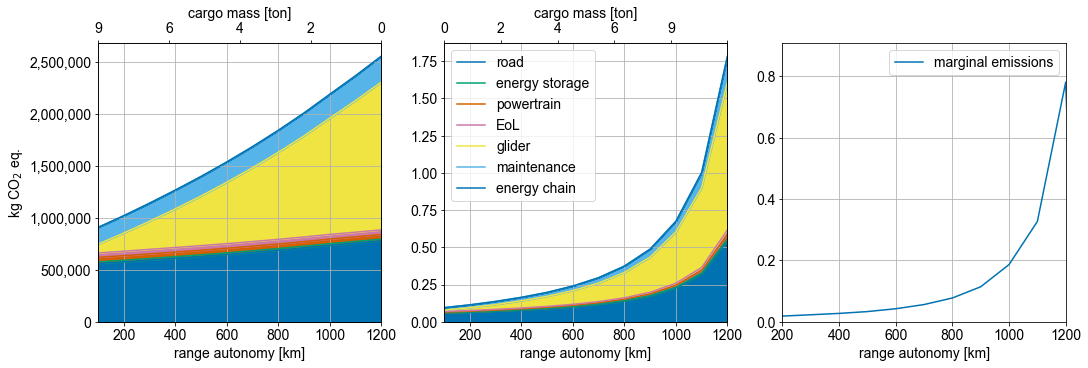

In [92]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 14
fig1, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15,5))

cols_total=[
    "energy chain - total",
    "maintenance - total",
    "glider - total",
    "EoL - total",
    "powertrain - total",
    "energy storage - total",
    "road - total",
]

cols=[
    "energy chain",
    "maintenance",
    "glider",
    "EoL",
    "powertrain",
    "energy storage",
    "road",
]

df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),["target range [km]"] + cols_total].plot(x="target range [km]",
                                                                     y=cols_total,
                                                                     kind="area", ax=axes[0], stacked=True)
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].set_ylabel("kg CO$_2$ eq.")
axes[0].get_legend().remove()
axes[0].set_xlabel("range autonomy [km]")
axes[0].set_xlim(100, 1200)
axes[0].grid()


ax2_km = axes[0].twiny()
ax2_km.xaxis.set_major_locator(plt.MaxNLocator(5))
vals = [str(int(v)) for v in np.linspace(9, 0, 5)]
ax2_km.set_xticklabels(vals)
ax2_km.set_xlim(0,.8)
ax2_km.set_xlabel("cargo mass [ton]")

df_km.loc[(df_km["powertrain type"]=="BEV")
          &(df_km["size"]=="40t"),["target range [km]"] + cols].plot(x="target range [km]",
                                                                     y=cols,
                                                                     kind="area", ax=axes[1], stacked=True)


axes[1].set_xlabel("range autonomy [km]")
#axes[1].legend()
axes[1].grid()
axes[1].set_xlim(100, 1200)
axes[1].legend(cols[::-1])

ax3_km = axes[1].twiny()
ax3_km.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax3_km.set_xticks(vals)
ax3_km.set_xticklabels(vals[::-1])
ax3_km.set_xlabel("cargo mass [ton]")


vals_marg=df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),cols_total].sum(axis=1).diff()/\
    ((df_km.loc[(df["powertrain type"]=="BEV")&(df_km["size"]=="40t"),"total cargo mass [kg]"]/1000)*\
    df_km.loc[(df["powertrain type"]=="BEV")&(df_km["size"]=="40t"),"lifetime [km]"]).values


vals_marg=df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),cols].sum(axis=1).diff()

xs=df_km.loc[(df_km["powertrain type"]=="BEV")&(df_km["size"]=="40t"),"target range [km]"].values

axes[2].plot(xs, vals_marg.values, label="marginal emissions")
axes[2].set_xlabel("range autonomy [km]")
axes[2].legend()
axes[2].grid()
axes[2].set_xlim(200, 1200)
axes[2].set_ylim(0, )



In [109]:
df.to_excel("results.xlsx")

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2